### Task 1 - Data Validation
Assess data quality and perform validation tasks

In [1]:
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Reading the dataset
emo_df = pd.read_csv('electric_bike_ratings_2212.csv')
# Meeting our data
display(emo_df.head())
emo_df.info()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


#### Task 1 - Data Quality

In [2]:
# parsing the year
year = dt.now().year.__str__()
emo_df['review_month'] = pd.to_datetime(emo_df['review_month'] + '-' + year)

# Checking number of unique values for some columns that should have a limited number of values
# This is to check if there are any typos or other errors in the data
for col in ['owned', 'make_model', 'web_browser', 'primary_use', 'value_for_money']:
    print(col, emo_df[col].unique())

# Converting the values to boolean
emo_df['owned'] = emo_df['owned'].astype('bool')

# Converting make_model to a categorical variable
emo_df['make_model'] = emo_df['make_model'].astype('category')

# Replacing null values with 'unknown' and converting the values to a categorical variable
emo_df['web_browser'].fillna('unknown', inplace=True)
emo_df['web_browser'] = emo_df['web_browser'].astype('category')

# Reviewer age string should be converted to integers and null values should be replaced with the mean
emo_df['reviewer_age'] = emo_df['reviewer_age'].replace('-', np.nan).astype("Int64")
mean_age = emo_df['reviewer_age'].mean(numeric_only=True).astype(int)
emo_df['reviewer_age'] = emo_df['reviewer_age'].fillna(mean_age)

# Converting primary_use to a categorical variable
emo_df['primary_use'] = emo_df['primary_use'].astype('category')

# Converting value_for_money to a numeric value
emo_df['value_for_money'] = emo_df['value_for_money'].apply(lambda x: int(x.split('/')[0]))

# Checking the tyes
emo_df.dtypes

owned [1 0]
make_model ['Nielah-Eyden' 'Nielah-Keetra' 'Lunna-Keetra' 'Hoang-Keetra'
 'Lunna-Eyden' 'Hoang-Eyden']
web_browser ['Chrome' nan 'IE' 'Firefox' 'Safari' 'Android' 'Opera']
primary_use ['Commuting' 'Leisure']
value_for_money ['5/10' '4/10' '3/10' '7/10' '6/10' '2/10' '9/10' '8/10' '10/10' '1/10']


owned                        bool
make_model               category
review_month       datetime64[ns]
web_browser              category
reviewer_age                Int64
primary_use              category
value_for_money             int64
overall_rating            float64
dtype: object

#### Task 2 - Data Validation

## Task 2

The EMO motorcycle received a higher number of reviews from owners (890 reviews) compared to non-owners (610 reviews), indicating that owners are really engaged in providing feedback about their acquisition.

Even though the observations across the categories are not balanced, the non-owners provide a valuable feedback in order to help EMO add new features to their products.

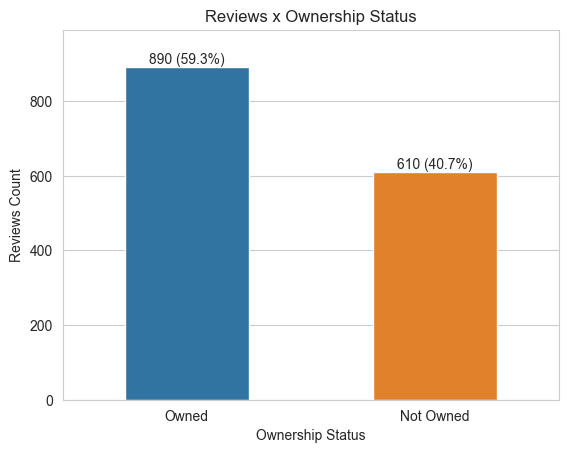

In [3]:
# Create the countplot
ax = sns.countplot(x="owned", data=emo_df, width=0.5, order=emo_df['owned'].value_counts().index)
sns.set_style("whitegrid")
plt.title("Reviews x Ownership Status")
plt.xticks([1, 0], ["Not Owned", "Owned"])
plt.xlabel("Ownership Status")
plt.ylabel("Reviews Count")
total = float(len(emo_df))
plt.ylim(0, max(emo_df['owned'].value_counts())+100)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} ({p.get_height()/len(emo_df)*100:.1f}%)',
                (p.get_x()+0.1, p.get_height()+10))
# Show the plot
plt.show()

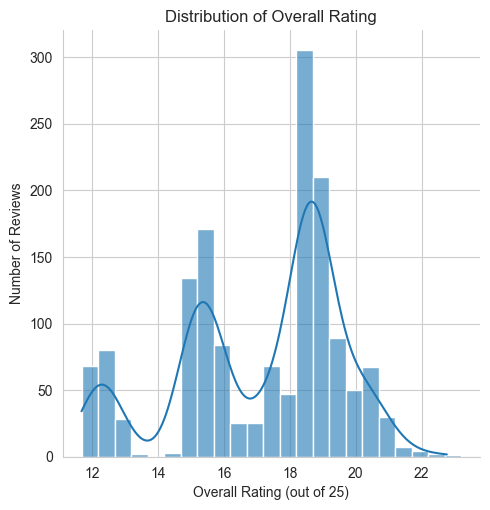

In [55]:
# sns.histplot(data=emo_df, x='overall_rating', kde=True, binwidth=0.5)
# sns.kdeplot(data=emo_df, x='overall_rating', fill=True, alpha=0.6)
# sns.displot(data=emo_df, x='overall_rating', fill=True, alpha=0.6, kde=True, binwidth=0.5, hue='owned', multiple='stack')
# sns.set_palette("RdBu_b")
sns.color_palette("Blues")
sns.displot(data=emo_df, x='overall_rating', fill=True, alpha=0.6, kde=True, binwidth=0.5)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating (out of 25)')
plt.ylabel('Number of Reviews')
plt.show()

In [5]:
# maybe I could add this to the report

overall_rating = emo_df.groupby('owned')['overall_rating'].mean()
print(overall_rating)

owned
False    15.733066
True     18.102461
Name: overall_rating, dtype: float64


In [6]:
overall_rating_mean = emo_df['overall_rating'].mean()
overall_rating_std = emo_df['overall_rating'].std()
overall_rating_var = emo_df['overall_rating'].var()
overall_rating_median = emo_df['overall_rating'].median()
overall_rating_percentile = emo_df['overall_rating'].quantile([0.25, 0.75])
overall_rating_min = emo_df['overall_rating'].min()
overall_rating_max = emo_df['overall_rating'].max()

print(f'Overall Rating Mean: {overall_rating_mean:.2f}')
print(f'Overall Rating Standard Deviation: {overall_rating_std:.2f}')
print('Overall Rating Percentiles: {}'.format(overall_rating_percentile))
print(f'Overall Rating Median: {overall_rating_median:.2f}')
print(f'Overall Rating Variance: {overall_rating_var:.2f}')
print(f'Overall Rating Min: {overall_rating_min:.2f}')
print(f'Overall Rating Max: {overall_rating_max:.2f}')

Overall Rating Mean: 17.14
Overall Rating Standard Deviation: 2.45
Overall Rating Percentiles: 0.25    15.32
0.75    18.84
Name: overall_rating, dtype: float64
Overall Rating Median: 18.24
Overall Rating Variance: 5.98
Overall Rating Min: 11.69
Overall Rating Max: 22.76
